## Support Vector Machines (SVMs)

A support vector machine, also known as an SVM, is a type of supervised machine learning model that uses classification techniques to solve problems involving two groups of categorization. When an SVM model is given sets of labeled training data for each category, it can classify newly encountered text.

They have two primary advantages over more recent algorithms such as neural networks: increased speed and improved performance with a limited number of data points (in the thousands). As a result, the approach is well suited to solving problems involving text classification, which frequently require access to datasets containing only a few thousand annotated examples at most.

### About data
The SVM is applied to classify the air quality, people affected by the pollution and their age group in New york city. The model is trained to predict the air quality and the age group and the number of people affected by the pollution.

The second set of data is emissions due to waste food disposal and crop residue. This data gives an overview of all kinds of emmission due to basic human activity like agriculture and waste food disposal. This data can be used as an example to show human impact on climate change.

#### Importing required librarires:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### Reading the data and removing unwanted columns:

In [13]:
data = pd.read_csv('../../data/ny-air.csv')
data.dropna(inplace=True)
data.drop(columns=['indicator_data_id','indicator_id','geo_type_name','geo_type_name','data_valuemessage'], inplace=True)
data.head()

,name,measure,geo_entity_id,geo_entity_name,year_description
0,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,1,Bronx,2005
1,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,2,Brooklyn,2005
2,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,3,Manhattan,2005
3,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,4,Queens,2005
4,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,5,Staten Island,2005


In [36]:
# Split the dataframe into X and y and then split X and y into train and test sets.
from sklearn.model_selection import train_test_split
X = data.drop(columns=["name"])

#y is the activity column
y = data["name"]

In [37]:
X

,measure,geo_entity_id,geo_entity_name,year_description
0,Average Concentration,1,Bronx,2005
1,Average Concentration,2,Brooklyn,2005
2,Average Concentration,3,Manhattan,2005
3,Average Concentration,4,Queens,2005
4,Average Concentration,5,Staten Island,2005
...,...,...,...,...
2764,Per 100 km2,410,Rockaways,2005
2765,Per 100 km2,501,Port Richmond,2005
2766,Per 100 km2,502,Stapleton - St. George,2005
2767,Per 100 km2,503,Willowbrook,2005


#### Split the dataset into training and testing sets

Before splitting the data into training and testing, it is scaled and labeled, with label encoding referring to converting the labels into a numeric form that is machine-readable.

By splitting our dataset into training and testing data, we can reserve some data to verify our model’s effectiveness. We do this split before we build our model in order to test the effectiveness against data that our model hasn’t yet seen.



In [38]:
#transform the string values into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['measure'] = le.fit_transform(X['measure'])
X['geo_entity_name'] = le.fit_transform(X['geo_entity_name'])
X['year_description'] = le.fit_transform(X['year_description'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
print(y_train.value_counts())

O3-Attributable Asthma ED Visits                                                317
O3-Attributable Asthma Hospitalizations                                         313
PM2.5-Attributable Asthma ED Visits                                             300
PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)       161
O3-Attributable Cardiac and Respiratory Deaths                                  158
PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)    155
PM2.5-Attributable Deaths                                                       145
Traffic Density- Annual Vehicle Miles Traveled (VMT)                             78
Traffic Density- Annual Vehicle Miles Traveled (VMT) for Trucks                  77
Traffic Density- Annual Vehicle Miles Traveled (VMT) for Cars                    72
Neighborhood Air Quality Concentrations- Nitric Oxide (NO)                       43
Air Toxics Concentrations- Average Benzene Concentrations                   

 ## SVM with Linear kernels

A Linear Kernel is used when data is Linearly separable, which means it can be partitioned along a straight line. It is one of the most commonly used kernels. Its primary application occurs when a given data set contains a large number of features.

To be more specific, the svc() function can be used to fit a support vector classifier if the kernel argument is set to "linear." This function uses a slightly modified version of the standard formulation to implement the support vector classifier. We can calculate the amount of money lost due to a margin violation using a cost argument. When the cost argument is weak, the margins are broad, and a large number of support vectors are either on the margin or violate it. When the cost argument is significant, the margins are low, and there are only a few support vectors that are either on the margin or violate the margin.

Using the svc() method, we can tailor the support vector classifier to the value supplied for the cost parameter, denoted by the letter 'C.' For this model, the cost margin is set to 0.5, and when performing supervised machine learning (classification) on categorical data, we frequently use a confusion matrix to calculate the number of correct and incorrect predictions for different classes.

In [55]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.
# Fit the classfier on the training data and predict on the test data. Set the classifier to be linear and C between 0.35-0.75. 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
clf = SVC(kernel='linear', C=0.5)
clf.fit(X_train, y_train)
yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

In [56]:
## Calculate the confusion matrix and classification report for the train and test data. 
train_confusion_matrix = confusion_matrix(y_train, yp_train)
test_confusion_matrix = confusion_matrix(y_test, yp_test)
train_classification_report = classification_report(y_train, yp_train, output_dict=True)
test_classification_report = classification_report(y_test, yp_test, output_dict=True)

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [57]:
# Save the results in a data frame. 
df_classification_report_test = pd.DataFrame(test_classification_report).transpose()
df_classification_report_train = pd.DataFrame(train_classification_report).transpose()

In [59]:
# display the results data frame
df_classification_report_test

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.250000,0.333333,0.285714,6.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.428571,0.333333,0.375000,9.000000
Boiler Emissions- Total NOx Emissions,0.217391,0.500000,0.303030,10.000000
Boiler Emissions- Total PM2.5 Emissions,0.272727,0.272727,0.272727,11.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,13.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,10.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.089286,1.000000,0.163934,5.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,17.000000


In [60]:
# display the results data frame for train
df_classification_report_train

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.537037,0.690476,0.604167,42.00000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.518519,0.358974,0.424242,39.00000
Boiler Emissions- Total NOx Emissions,0.369863,0.710526,0.486486,38.00000
Boiler Emissions- Total PM2.5 Emissions,0.351351,0.351351,0.351351,37.00000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,35.00000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,38.00000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,36.00000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.233696,1.000000,0.378855,43.00000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,36.00000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,31.00000


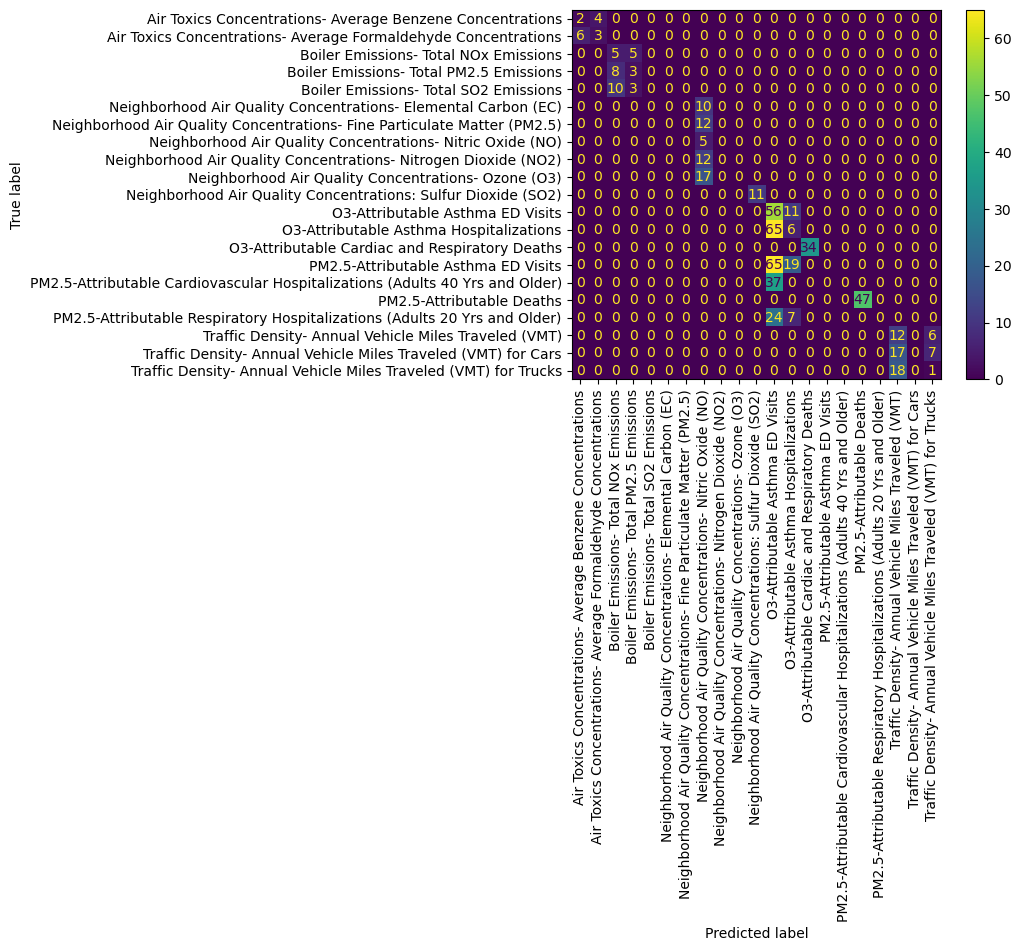

In [61]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=clf.classes_)
disp.plot(xticks_rotation='vertical')

With linear kernel, the model is yeilding 33% accuracy for train data and 39% for test data.

 ## SVM with Polynomial kernels

Polynomial Kernel represents the degree of similarity between vectors in the training set of data in a feature space over polynomials of the variables used in the kernel. The polynomial kernel is a machine learning kernel function that is commonly used with support vector machines (SVMs) and other kernelized models to represent the similarity of vectors (training samples) in a feature space over polynomials of the original variables and facilitate non-linear model learning.

To be more specific, a support vector classifier can be fitted using the input kernel = "poly" and the svc() function. We can get an idea of the financial damage caused by a margin violation by presenting the cost of it. We can adjust the support vector classifier to the value of the cost argument by calling the svc() function (denoted by the letter C). We frequently use a confusion matrix to determine the count of accurate and inaccurate predictions for distinct classes when performing supervised machine learning (classification) on categorical data; in this model, we set the cost margin to 0.5.

In [62]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.
# Fit the classfier on the training data and predict on the test data. Set the classifier to be polynomial, C between 0.35-0.75, and degree = 2. 
clf = SVC(kernel='poly', C=0.5, degree=2)
clf.fit(X_train, y_train)
yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

In [63]:
# Calculate the confusion matrix and classification report for the train and test data. 
train_confusion_matrix = confusion_matrix(y_train, yp_train)
test_confusion_matrix = confusion_matrix(y_test, yp_test)
train_classification_report = classification_report(y_train, yp_train, output_dict=True)
test_classification_report = classification_report(y_test, yp_test, output_dict=True)

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [64]:
# Save the results in a data frame.
df_classification_report_test = pd.DataFrame(test_classification_report).transpose()
df_classification_report_train = pd.DataFrame(train_classification_report).transpose()

In [65]:
# display the results data frame
df_classification_report_test

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.000000,0.000000,0.000000,6.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.000000,0.000000,0.000000,9.000000
Boiler Emissions- Total NOx Emissions,0.000000,0.000000,0.000000,10.000000
Boiler Emissions- Total PM2.5 Emissions,0.000000,0.000000,0.000000,11.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,13.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,10.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.000000,0.000000,0.000000,5.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,17.000000


In [66]:
# display the results data frame for train
df_classification_report_train

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.000000,0.000000,0.000000,42.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.000000,0.000000,0.000000,39.000000
Boiler Emissions- Total NOx Emissions,0.000000,0.000000,0.000000,38.000000
Boiler Emissions- Total PM2.5 Emissions,0.000000,0.000000,0.000000,37.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,35.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,38.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,36.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.000000,0.000000,0.000000,43.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,36.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,31.000000


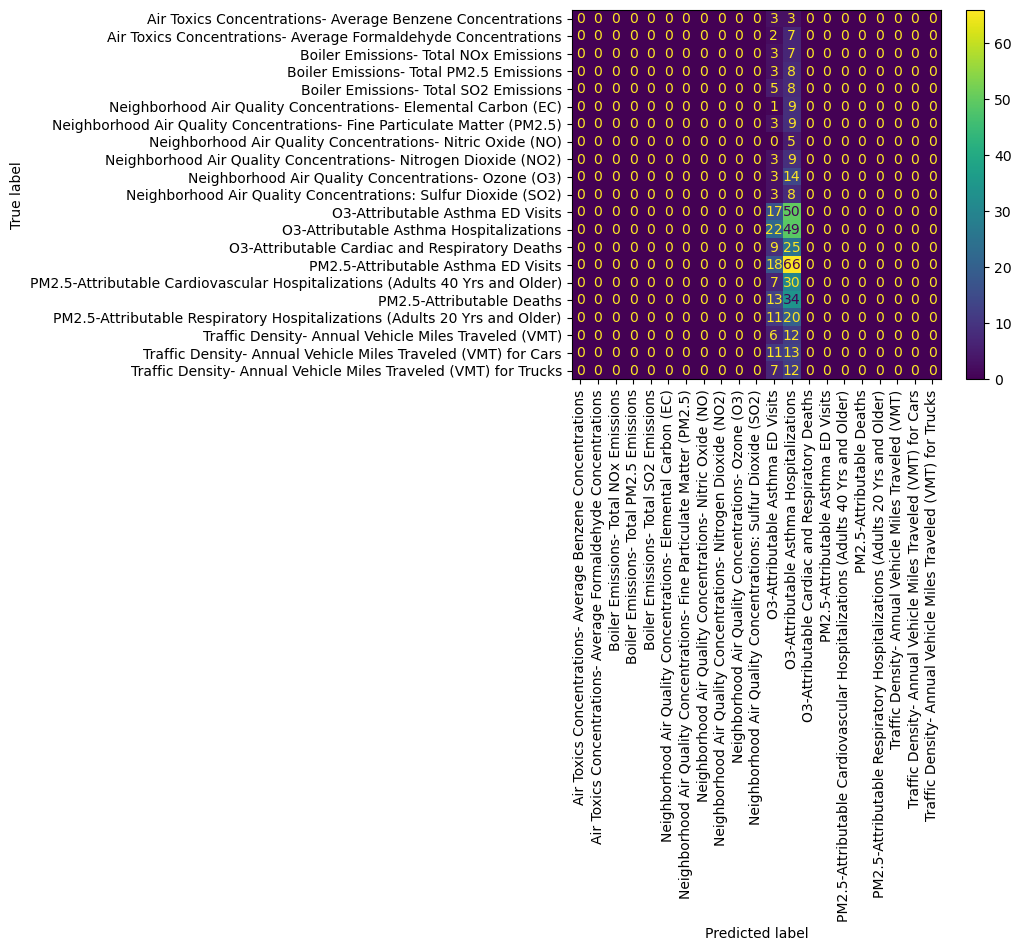

In [67]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
dist = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=clf.classes_)
dist.plot(xticks_rotation='vertical')

With Polynomial kernel, the model is yeilding 12% accuracy for train data and 14% for test data.

 ## SVM with RBF kernels

RBF kernels are the broadest type of kernelization. They are also one of the most commonly used kernels due to their resemblance to the Gaussian distribution, which is one of the most common. It is a kernel that can be used for a variety of applications and is used when there is no prior knowledge about the data. It is used specifically when there is no prior knowledge of the data. To be more specific, a support vector classifier can be fitted using the input kernel = "rbf" and the svc() function. We can get an idea of the financial damage caused by a margin violation by presenting the cost of it. We can adjust the support vector classifier to the value of the cost argument by calling the svc() function (denoted by the letter C). We frequently use a confusion matrix to determine the count of accurate and inaccurate predictions for distinct classes when performing supervised machine learning (classification) on categorical data; in this model, we set the cost margin to 0.5.

In [68]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.
# Fit the classfier on the training data and predict on the test data. Set the classifier to be linear and C between 0.35-0.75.
clf = SVC(kernel='rbf', C=0.5)
clf.fit(X_train, y_train)
yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test) 

In [69]:
# Calculate the confusion matrix and classification report for the train and test data. 
train_confusion_matrix = confusion_matrix(y_train, yp_train)
test_confusion_matrix = confusion_matrix(y_test, yp_test)
train_classification_report = classification_report(y_train, yp_train, output_dict=True)
test_classification_report = classification_report(y_test, yp_test, output_dict=True)

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [70]:
# Save the results in a data frame.
df_classification_report_test = pd.DataFrame(test_classification_report).transpose()
df_classification_report_train = pd.DataFrame(train_classification_report).transpose()

In [71]:
# display the results data frame
df_classification_report_test

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.000000,0.000000,0.000000,6.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.000000,0.000000,0.000000,9.000000
Boiler Emissions- Total NOx Emissions,0.000000,0.000000,0.000000,10.000000
Boiler Emissions- Total PM2.5 Emissions,0.000000,0.000000,0.000000,11.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,13.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,10.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.000000,0.000000,0.000000,5.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,17.000000


In [72]:
# display the results data frame for train
df_classification_report_train

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.000000,0.000000,0.000000,42.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.000000,0.000000,0.000000,39.000000
Boiler Emissions- Total NOx Emissions,0.000000,0.000000,0.000000,38.000000
Boiler Emissions- Total PM2.5 Emissions,0.000000,0.000000,0.000000,37.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,35.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,38.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,36.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.000000,0.000000,0.000000,43.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,36.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,31.000000


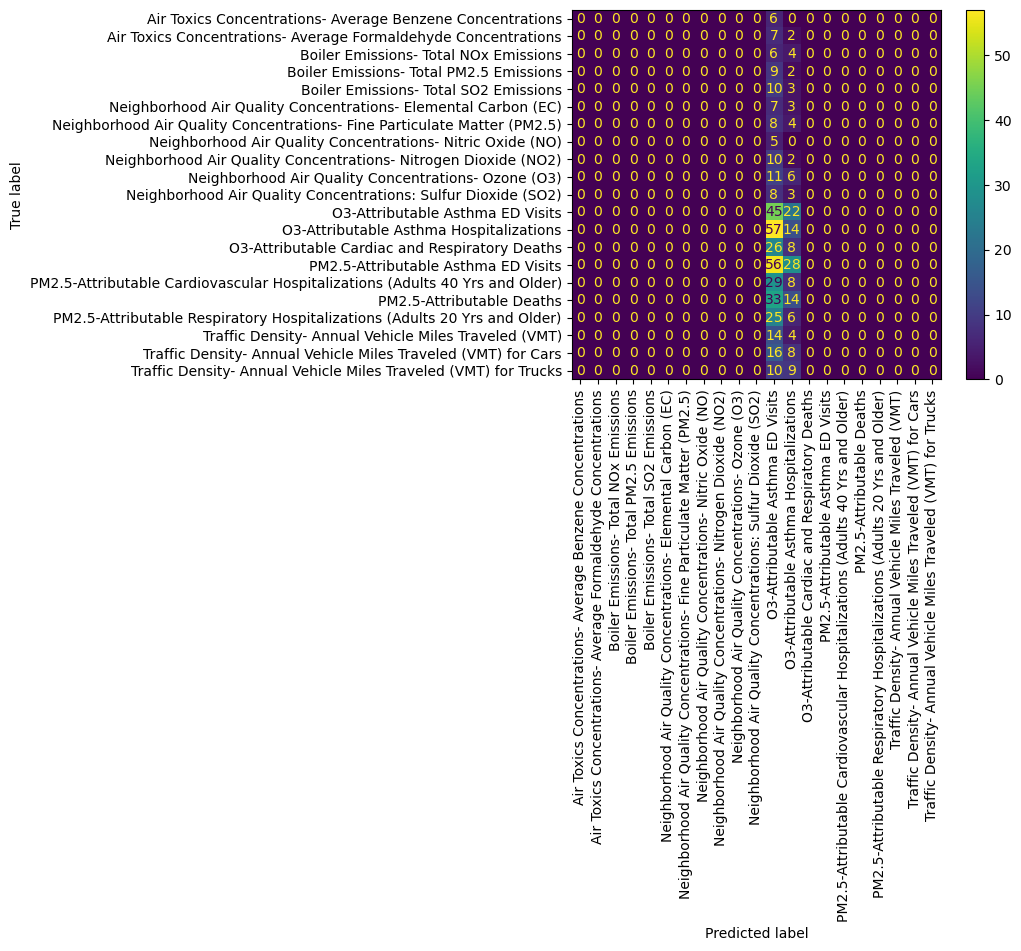

In [73]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
dist = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=clf.classes_)
dist.plot(xticks_rotation='vertical')

With RBF kernel, the model is yeilding 10% accuracy for train data and 14% for test data.

## SVM with Sigmoid kernels

The Sigmoid function serves as an activation function, which is used to add non-linearity to a machine learning model. Essentially, the function determines which values to pass as output and which to reject.

In [74]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.
# Fit the classfier on the training data and predict on the test data. Set the classifier to be linear and C between 0.35-0.75. 
clf = SVC(kernel='sigmoid', C=0.5)
clf.fit(X_train, y_train)
yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

In [75]:
# Calculate the confusion matrix and classification report for the train and test data. 
train_confusion_matrix = confusion_matrix(y_train, yp_train)
test_confusion_matrix = confusion_matrix(y_test, yp_test)
train_classification_report = classification_report(y_train, yp_train, output_dict=True)
test_classification_report = classification_report(y_test, yp_test, output_dict=True)

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [76]:
# Save the results in a data frame.
df_classification_report_test = pd.DataFrame(test_classification_report).transpose()
df_classification_report_train = pd.DataFrame(train_classification_report).transpose()

In [77]:
# display the results data frame for test
df_classification_report_test

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.000000,0.000000,0.000000,6.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.000000,0.000000,0.000000,9.000000
Boiler Emissions- Total NOx Emissions,0.000000,0.000000,0.000000,10.000000
Boiler Emissions- Total PM2.5 Emissions,0.000000,0.000000,0.000000,11.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,13.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,10.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.000000,0.000000,0.000000,5.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,12.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,17.000000


In [78]:
# display the results data frame for train
df_classification_report_train

,precision,recall,f1-score,support
Air Toxics Concentrations- Average Benzene Concentrations,0.000000,0.000000,0.000000,42.000000
Air Toxics Concentrations- Average Formaldehyde Concentrations,0.000000,0.000000,0.000000,39.000000
Boiler Emissions- Total NOx Emissions,0.000000,0.000000,0.000000,38.000000
Boiler Emissions- Total PM2.5 Emissions,0.000000,0.000000,0.000000,37.000000
Boiler Emissions- Total SO2 Emissions,0.000000,0.000000,0.000000,35.000000
Neighborhood Air Quality Concentrations- Elemental Carbon (EC),0.000000,0.000000,0.000000,38.000000
Neighborhood Air Quality Concentrations- Fine Particulate Matter (PM2.5),0.000000,0.000000,0.000000,36.000000
Neighborhood Air Quality Concentrations- Nitric Oxide (NO),0.000000,0.000000,0.000000,43.000000
Neighborhood Air Quality Concentrations- Nitrogen Dioxide (NO2),0.000000,0.000000,0.000000,36.000000
Neighborhood Air Quality Concentrations- Ozone (O3),0.000000,0.000000,0.000000,31.000000


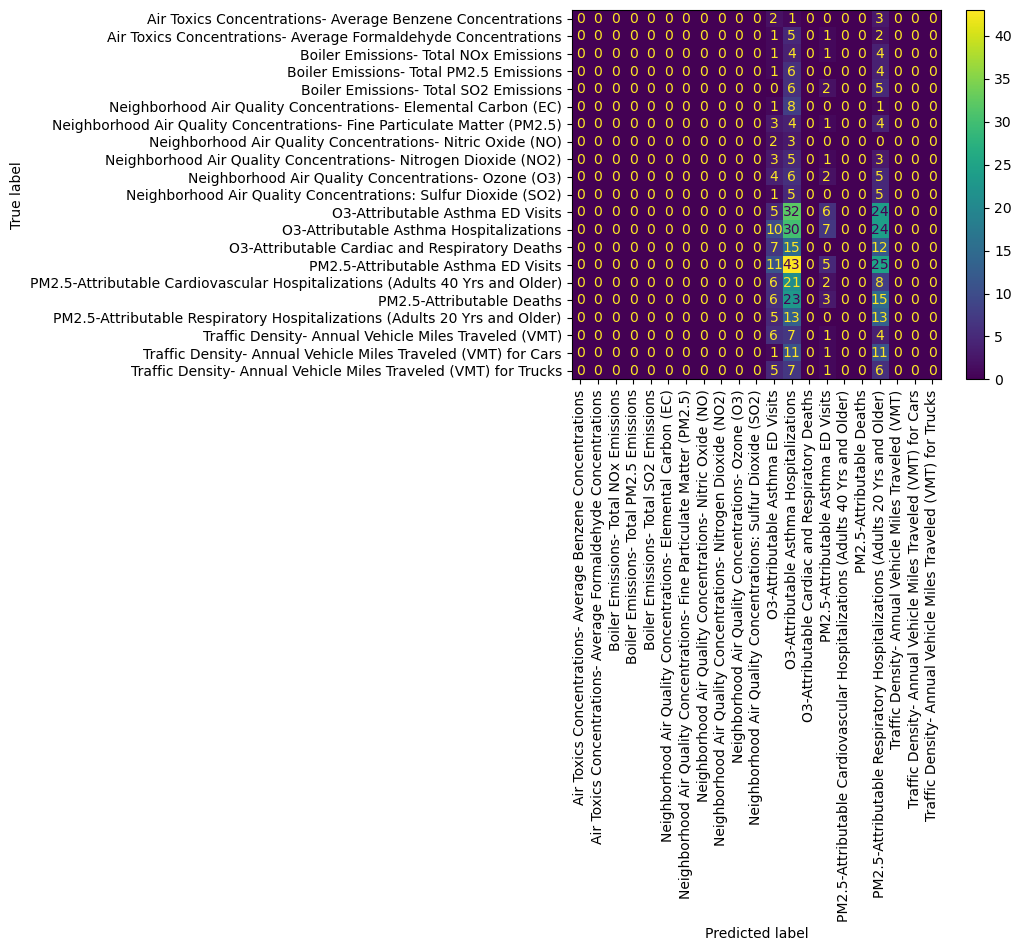

In [79]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
dist = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=clf.classes_)
dist.plot(xticks_rotation='vertical')

With Sigmoid, the model is yeilding 9% accuracy for train data and 12% for test data.

SVM is done on Food disposal and crop residue data, to classify different emissions to the nevironment. Various kernels is used to find out the best model for classification.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Reading the clean data

In [2]:
#import the data
food_data =pd.read_csv('../../data/food_crop_data.csv')
food_data.head()


,Domain,Area,Element,Item,Year,Value
0,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1990,10.629803
1,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1991,10.934600
2,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1992,11.138956
3,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1993,11.335046
4,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1994,11.754348


Converting non numeric columns to numeric using label encoder.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
food_data['Area'] = le.fit_transform(food_data['Area'])
food_data['Element'] = le.fit_transform(food_data['Element'])
food_data['Item'] = le.fit_transform(food_data['Item'])
food_data['Domain'] = le.fit_transform(food_data['Domain'])

Training and testing the data

In [7]:
X = food_data.drop(['Element'],axis=1)
y = food_data['Element']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=46)

## SVM on Linear Kernel

In [8]:
#SVM Classifier on df on linear kernel
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score: 0.8935361216730038
Confusion Matrix: [[ 73   0   0   0]
 [  0  48   0  28]
 [  0   0  10   0]
 [  0   0   0 104]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      0.63      0.77        76
           2       1.00      1.00      1.00        10
           3       0.79      1.00      0.88       104

    accuracy                           0.89       263
   macro avg       0.95      0.91      0.91       263
weighted avg       0.92      0.89      0.89       263



Linear kernel is giving about 89% accuracy. The confusion matrix is done for the same.

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


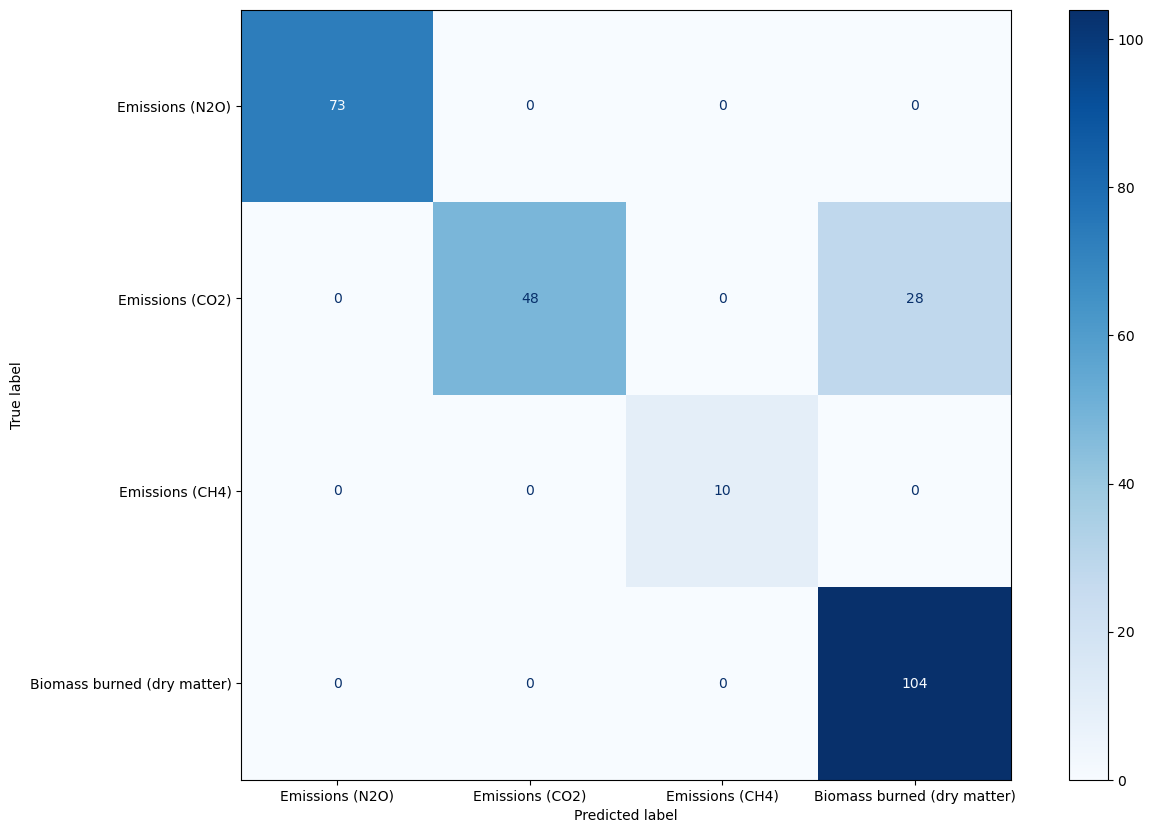

In [9]:
#plot confusion matrix for svm classifier with labels
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(svc,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()

## SVM on Polynomial Kernel.

In [10]:
#SVM Classifier on food_data on polynomial kernel
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))


Accuracy Score: 0.4600760456273764
Confusion Matrix: [[ 45  28   0   0]
 [  0  76   0   0]
 [  0  10   0   0]
 [  0 104   0   0]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.62      0.76        73
           1       0.35      1.00      0.52        76
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00       104

    accuracy                           0.46       263
   macro avg       0.34      0.40      0.32       263
weighted avg       0.38      0.46      0.36       263



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model yields 46% Accuracy. Below is the confusion Matrix.

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


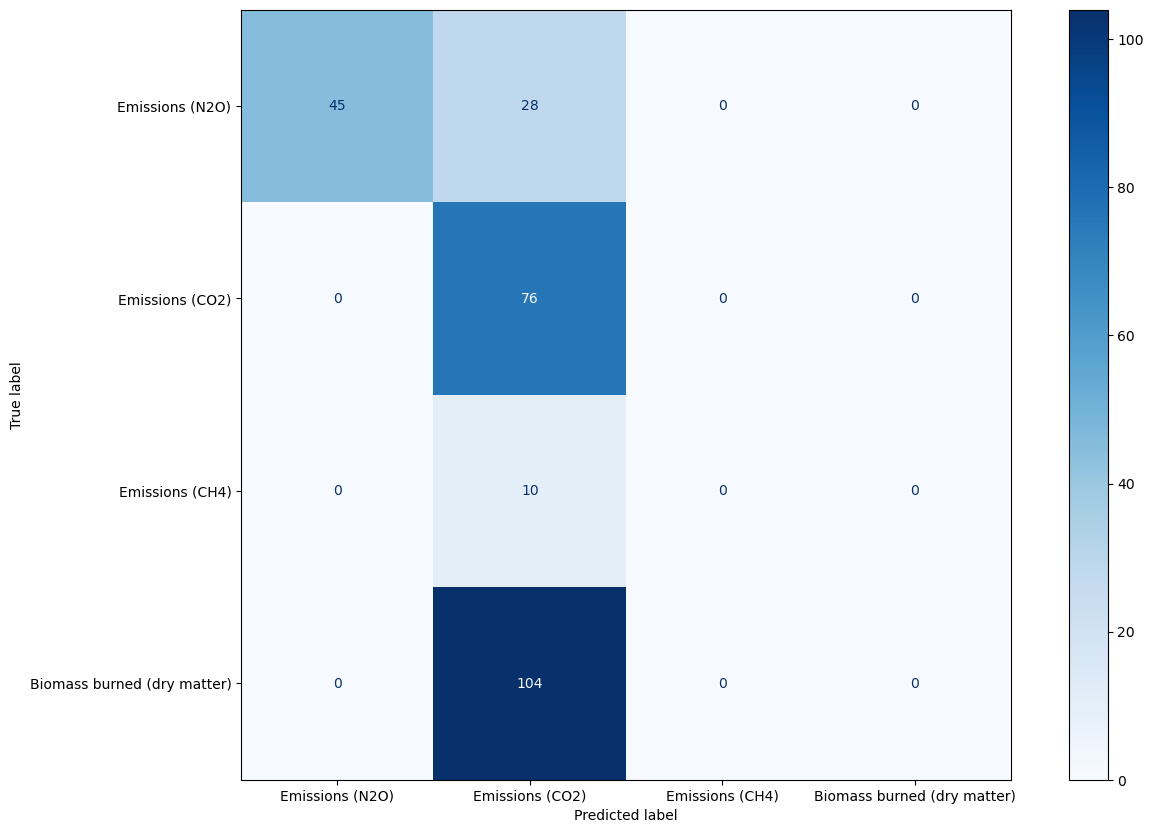

In [11]:
#plot confusion matrix for svm classifier with labels
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(svc,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()

## SVM on rbf Kernel

In [12]:
#SVM Classifier on food_data on rbf kernel
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score: 0.4714828897338403
Confusion Matrix: [[ 48  25   0   0]
 [  0  76   0   0]
 [  0  10   0   0]
 [  0 104   0   0]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.66      0.79        73
           1       0.35      1.00      0.52        76
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00       104

    accuracy                           0.47       263
   macro avg       0.34      0.41      0.33       263
weighted avg       0.38      0.47      0.37       263



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model yields 47% accuracy and the confusion matrix is plotted for the same.

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


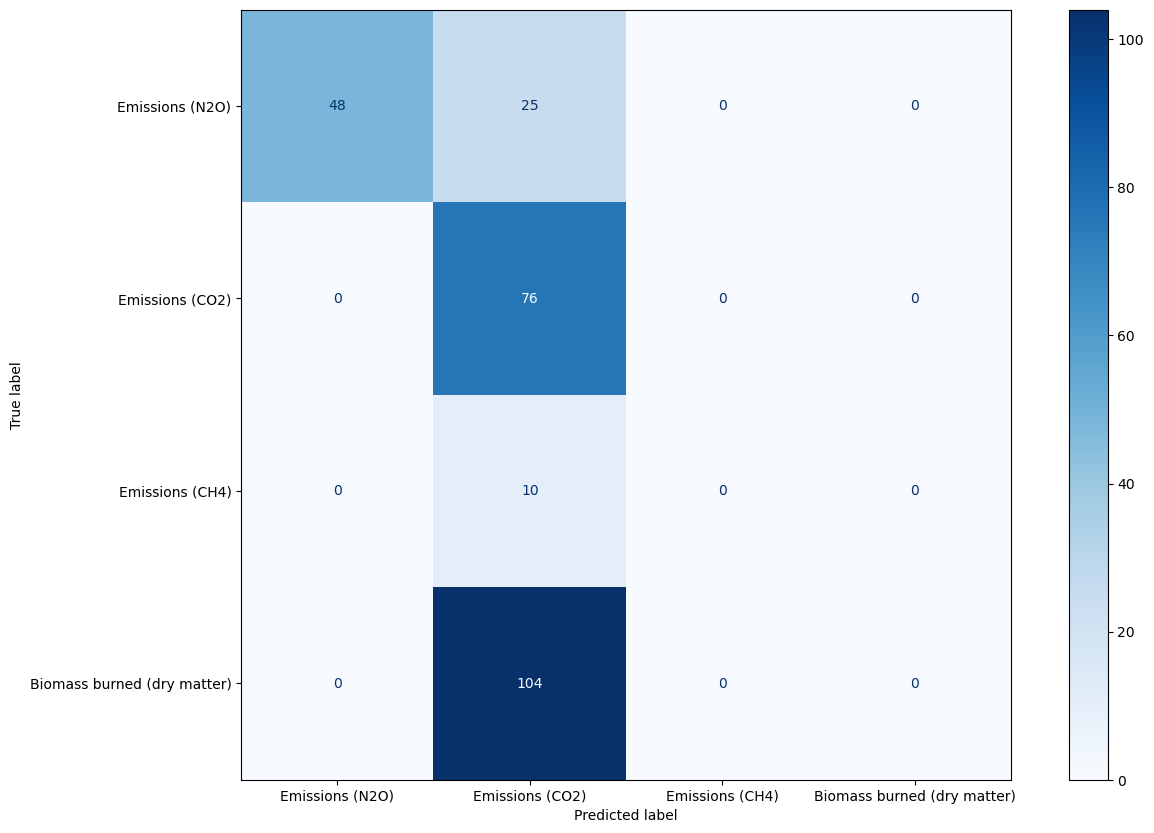

In [13]:
#plot confusion matrix for svm classifier with labels
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(svc,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()

## SVM on Sigmoid Kernel

In [14]:
#SVM Classifier on food_data on sigmoid kernel
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score: 0.4600760456273764
Confusion Matrix: [[ 45  28   0   0]
 [  0  76   0   0]
 [  0  10   0   0]
 [  0 104   0   0]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.62      0.76        73
           1       0.35      1.00      0.52        76
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00       104

    accuracy                           0.46       263
   macro avg       0.34      0.40      0.32       263
weighted avg       0.38      0.46      0.36       263



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model is yielding about 45% accuracy and the confusion matrix is plotted for the same.

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


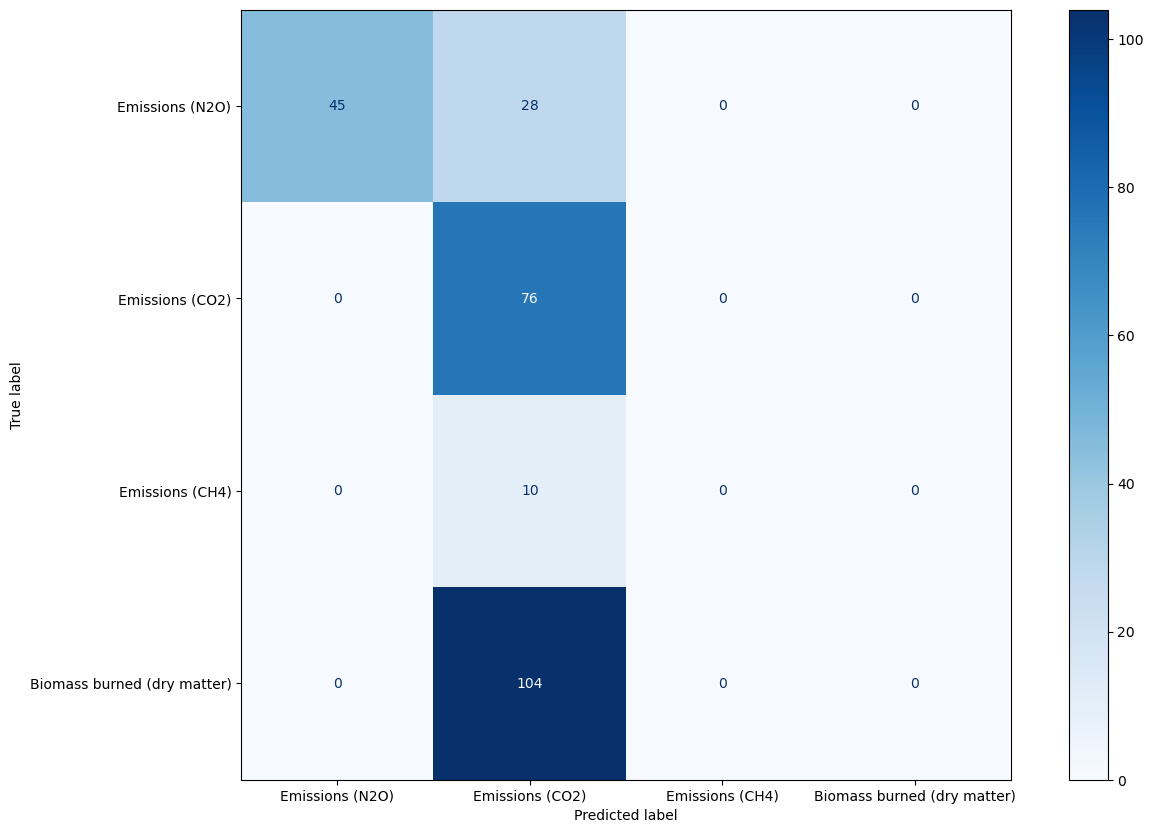

In [15]:
#plot confusion matrix for svm classifier with labels
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(svc,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()

## Conclusion

Various kernels produced varying degrees of accuracy. Finally, the linear kernel is best suited for the data with the highest accuracy. The model predicts the age group of people affected by air pollution in New York City. 
The second set of data is trained and tested to predict the emission element to the environment due to waste food disposal and crop residue. 